In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load fashion-MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

location = r""
X_test, y_test = load_mnist(location, kind='t10k')

X_test = X_test/255

X_train, y_train = load_mnist(location)

X_train = X_train/255

print(np.max(X_test))
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

1.0
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [2]:
train_mask = np.isin(y_train, [3, 6, 7])
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = np.isin(y_test, [3, 6, 7])
X_test = X_test[test_mask]
y_test = y_test[test_mask]

print(y_train)
print(y_test)

X_train = np.random.permutation(X_train)
y_train = np.random.permutation(y_train)
X_test = np.random.permutation(X_test)
y_test = np.random.permutation(y_test)

print(y_train)
print(y_test)

[3 7 7 ... 6 7 3]
[6 6 7 ... 3 7 6]
[6 3 3 ... 6 7 6]
[6 6 6 ... 3 6 7]


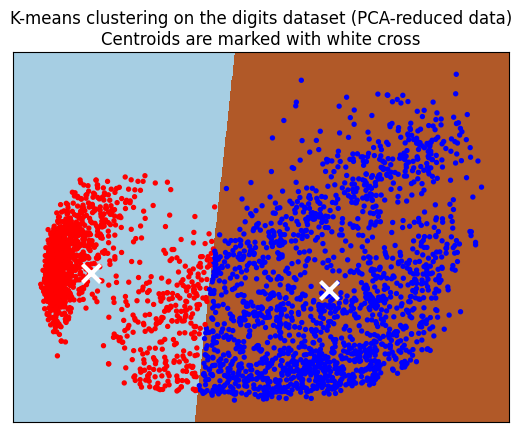

In [10]:
import matplotlib.pyplot as plt

X_test_pca = PCA(n_components=2).fit_transform(X_test)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(X_test_pca)
kmeans_labels = kmeans.predict(X_test_pca)


feature_1 = X_test_pca[:, 0]
feature_2 = X_test_pca[:, 1]

data = pd.DataFrame({
    'Feature1': feature_1,
    'Feature2': feature_2
})

colors = ["r", "b", "g", "y"]
colors_labels = []

labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
label_labels = []

for i in kmeans_labels:
    colors_labels += [colors[i]]
    label_labels += [labels[i]]

data['Cluster'] = kmeans_labels
data['Colour'] = colors_labels
data['Label'] = label_labels


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

#plt.plot(X_test_pca[:, 0], X_test_pca[:, 1], "k.", markersize=2)
plt.scatter(data=data, x='Feature1', y='Feature2',color='Colour', label='Label', s=8)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

for i in zip(np.unique(y_train)):
    feature_1 += X_train_pca[y_train == i, 0]
    feature_2 += X_train_pca[y_train == i, 1]

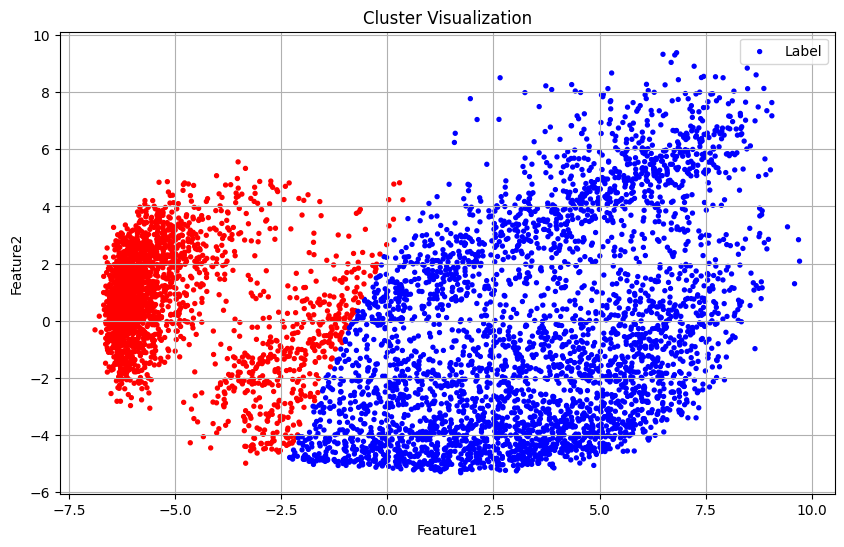

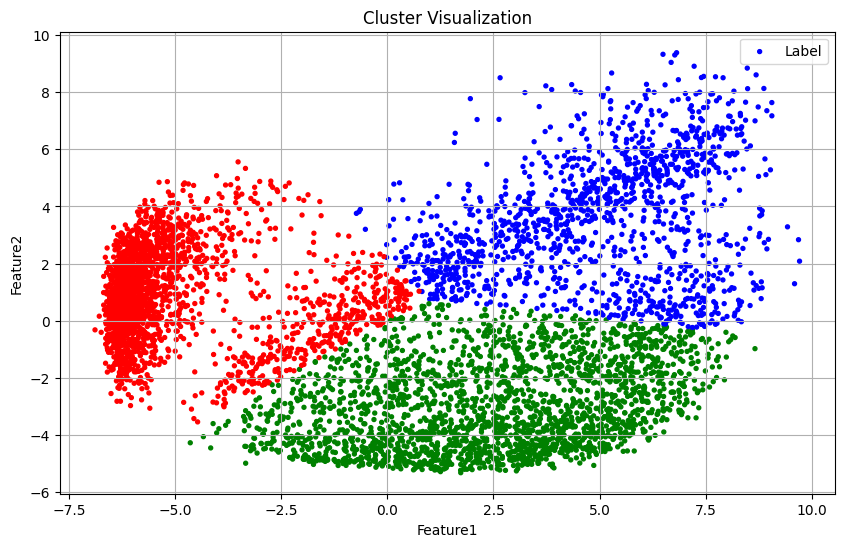

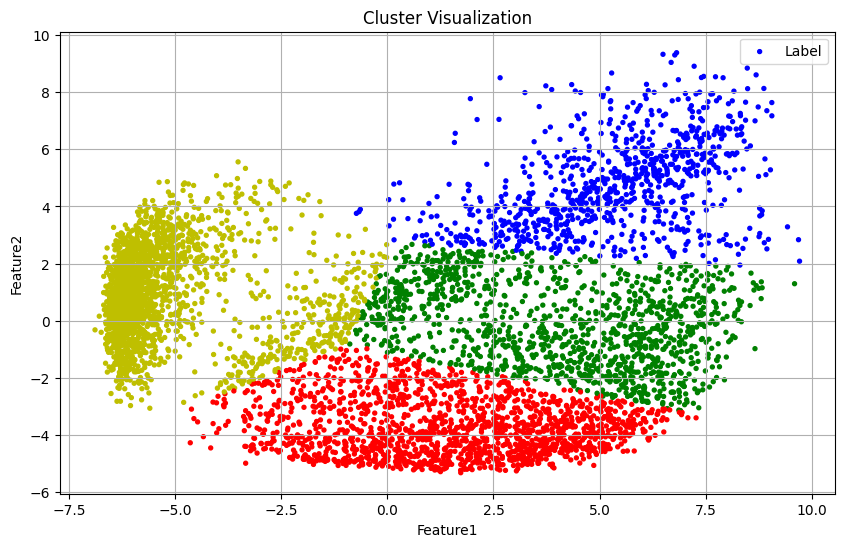

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
def pca_kmeans_cluster_plot(x):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=x)
    X_train_pca = pca.fit_transform(X_train)

    feature_1 = None
    feature_2 = None

    for i in zip(np.unique(y_train)):
        feature_1 = X_train_pca[y_train == i, 0]
        feature_2 = X_train_pca[y_train == i, 1]

    data = pd.DataFrame({
        'Feature1': feature_1,
        'Feature2': feature_2
    })

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    kmeans = KMeans(n_clusters=x, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)


    colors = ["r", "b", "g", "y"]
    colors_labels = []

    labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
    label_labels = []

    for i in kmeans_labels:
        colors_labels += [colors[i]]
        label_labels += [labels[i]]

    data['Cluster'] = kmeans_labels
    data['Colour'] = colors_labels
    data['Label'] = label_labels


    plt.figure(figsize=(10, 6))
    plt.scatter(data=data, x='Feature1', y='Feature2',color='Colour', label='Label', s=8)
    plt.title('Cluster Visualization')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')

    handles, labels = plt.gca().get_legend_handles_labels()
    dict_of_labels = dict(zip(labels, handles))

    plt.legend(dict_of_labels.values(), dict_of_labels.keys())

    plt.grid(True)
    plt.show()

pca_kmeans_cluster_plot(2)
pca_kmeans_cluster_plot(3)
pca_kmeans_cluster_plot(4)

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_train_pca)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_pca, kmeans_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca, kmeans_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(kmeans_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_train_pca[:, 0], X_train_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [81]:
# standardize the data

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print(X_train)

[[-1.21774862e-02 -2.29497040e-02 -3.38612665e-02 ... -9.51899017e-02
  -5.19785256e-02 -2.21577504e-02]
 [-1.21774862e-02 -2.29497040e-02 -3.38612665e-02 ... -9.51899017e-02
  -5.19785256e-02 -2.21577504e-02]
 [-1.21774862e-02 -2.29497040e-02  3.55679376e+01 ... -9.51899017e-02
  -5.19785256e-02 -2.21577504e-02]
 ...
 [-1.21774862e-02 -2.29497040e-02 -3.38612665e-02 ... -9.51899017e-02
  -5.19785256e-02 -2.21577504e-02]
 [-1.21774862e-02 -2.29497040e-02 -3.38612665e-02 ... -9.51899017e-02
  -5.19785256e-02 -2.21577504e-02]
 [-1.21774862e-02 -2.29497040e-02 -3.38612665e-02 ... -9.51899017e-02
  -5.19785256e-02 -2.21577504e-02]]


In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")

Train score before PCA 0.5295555555555556 %


In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

pca.get_covariance()

array([[6.10955911e-01, 1.93852250e-04, 4.07727118e-04, ...,
        1.56187287e-03, 9.59532338e-04, 4.61194457e-04],
       [1.93852250e-04, 6.11753899e-01, 1.76936119e-03, ...,
        6.77710001e-03, 4.15953446e-03, 1.99708952e-03],
       [4.07727118e-04, 1.76936119e-03, 6.14698842e-01, ...,
        1.45264264e-02, 9.01586663e-03, 4.38364558e-03],
       ...,
       [1.56187287e-03, 6.77710001e-03, 1.45264264e-02, ...,
        6.66629871e-01, 3.46080161e-02, 1.68411030e-02],
       [9.59532338e-04, 4.15953446e-03, 9.01586663e-03, ...,
        3.46080161e-02, 6.32543090e-01, 1.06002911e-02],
       [4.61194457e-04, 1.99708952e-03, 4.38364558e-03, ...,
        1.68411030e-02, 1.06002911e-02, 6.16145532e-01]], shape=(784, 784))

In [84]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_pca,y_train)
print("Train score after PCA",knn_pca.score(X_pca,y_train),"%")

Train score after PCA 0.5229444444444444 %


In [85]:
explained_variance=pca.explained_variance_ratio_
pca.explained_variance_ratio_


array([0.26439935, 0.12628165])

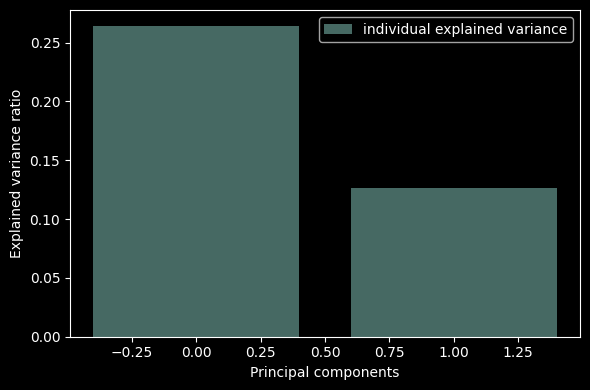

In [88]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

C:\Users\Dylan\AppData\Local\Temp\ipykernel_6660\1375088339.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


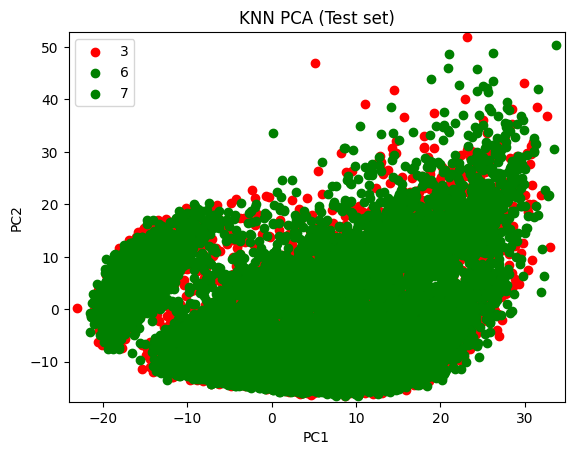

In [90]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Train score after PCA 0.5278333333333334 %


--------------------------------------

c:\Users\Dylan\anaconda3\envs\jupyter_notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


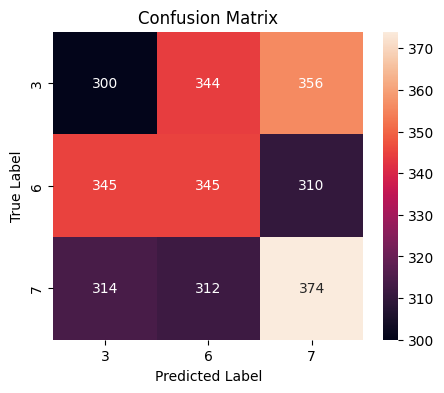

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def reshape_and_normalize(images):

    # Reshape the images to add an extra dimension
    images = np.reshape(images, (60000,28,28,1))
    
    # Normalize pixel values
    images = images / 255.0

    return images

def show_image(normalized=False):
    import random
    import matplotlib.pyplot as plt
    X1 = np.array(X_train)
    rand_num = random.randrange(0, len(X_train))
    if normalized == False:
        X1 = X1 / 255.0
    print(X1[rand_num])
    image = X1[rand_num].reshape(28,28)
    plt.matshow(image)
    plt.show

#show_image(normalized=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(5,4))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=['3', '6', '7'], yticklabels=['3', '6', '7'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

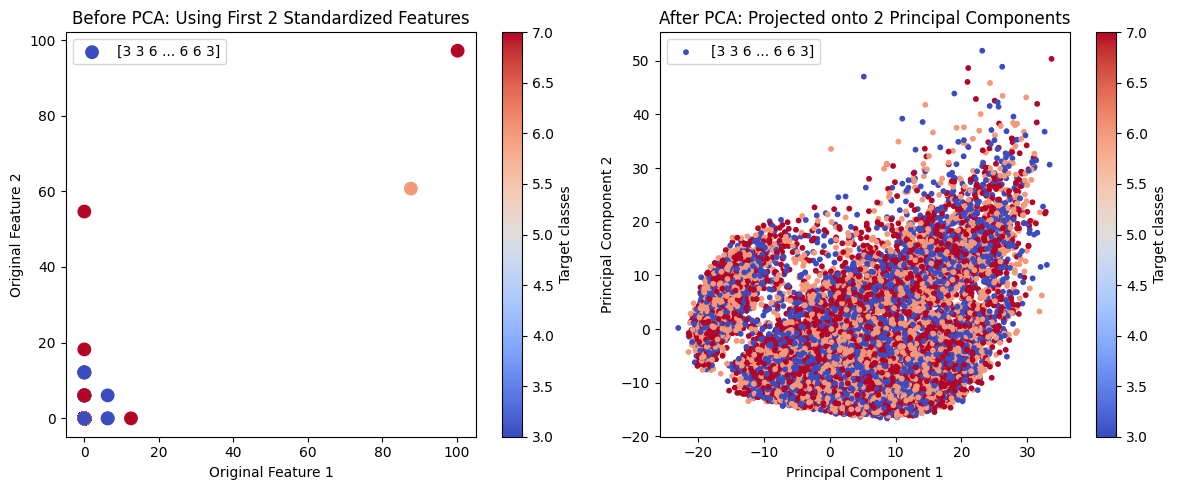

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.xlabel('Original Feature 1')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='o', linestyle='', cmap='coolwarm', s=80, c=y_train, label=y_train)
plt.ylabel('Original Feature 2')
plt.legend()
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', linestyle='', cmap='coolwarm', s=10, c=y_train, label=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load fashion-MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

location = r""
X_test, y_test = load_mnist(location, kind='t10k')

X_test = X_test/255

X_train, y_train = load_mnist(location)

X_train = X_train/255

print(np.max(X_test))
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

1.0
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
train_mask = np.isin(y_train, [3, 6, 7])
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = np.isin(y_test, [3, 6, 7])
X_test = X_test[test_mask]
y_test = y_test[test_mask]

print(y_train)
print(y_test)

X_train = np.random.permutation(X_train)
y_train = np.random.permutation(y_train)
X_test = np.random.permutation(X_test)
y_test = np.random.permutation(y_test)

print(y_train)
print(y_test)

[3 7 7 ... 6 7 3]
[6 6 7 ... 3 7 6]
[3 3 6 ... 7 6 3]
[7 7 7 ... 6 7 7]


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred = classifier.predict(X_test)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

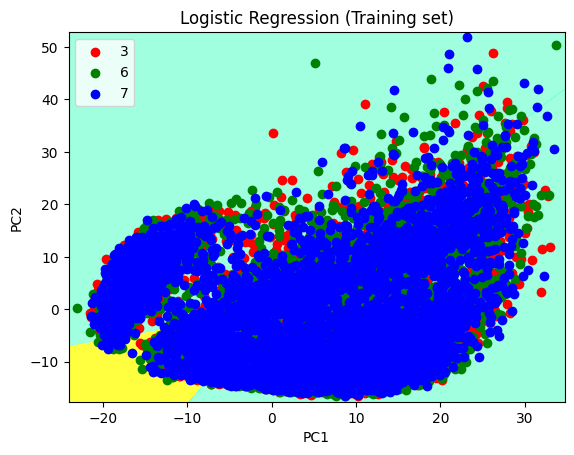

In [14]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()  # to show legend

# show scatter plot
plt.show()

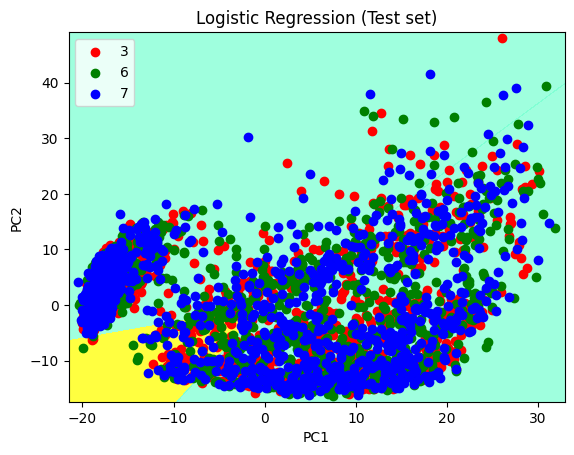

In [15]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue'))(i), label=j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()

# show scatter plot
plt.show()

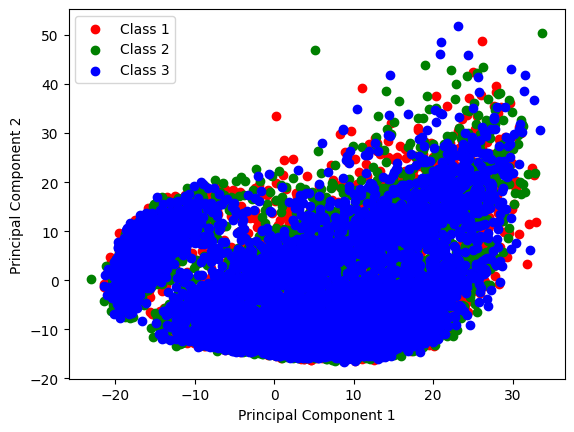

In [16]:
colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for i, color, label in zip(np.unique(y_train), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

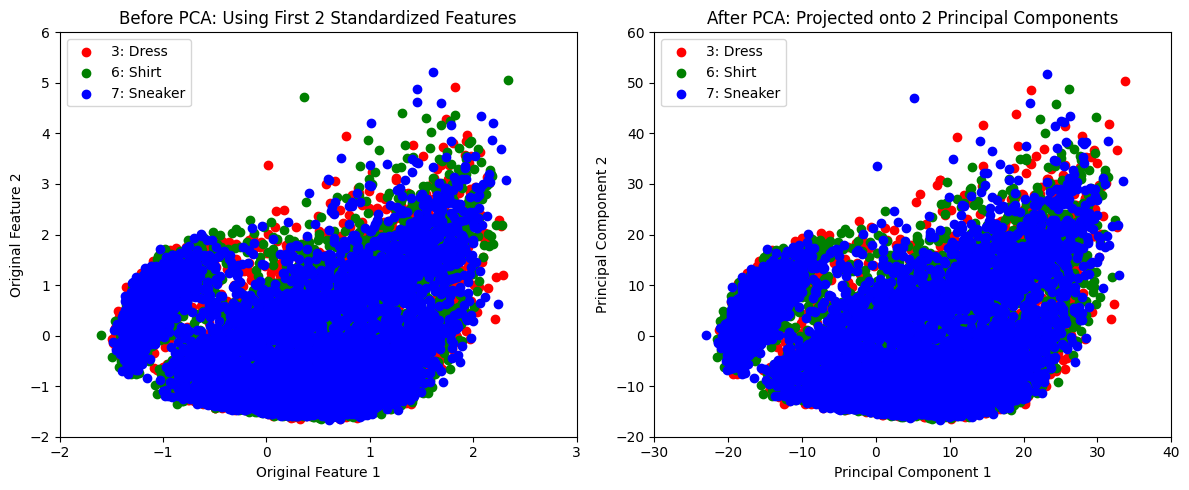

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ["r", "g", "b"]
labels = ["3: Dress", "6: Shirt", "7: Sneaker"]
for i, color, label in zip(np.unique(y_train), colors, labels):
    plt.scatter(X_scaled[y_train == i, 0], X_scaled[y_train == i, 1], color=color, label=label)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.ylim(-2, 6)
plt.xlim(-2,3)
plt.legend()
plt.title('Before PCA: Using First 2 Standardized Features')


plt.subplot(1, 2, 2)
colors = ["r", "g", "b"]
labels = ["3: Dress", "6: Shirt", "7: Sneaker"]
for i, color, label in zip(np.unique(y_train), colors, labels):
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.ylim(-20, 60)
plt.xlim(-30,40)
plt.legend()
plt.title('After PCA: Projected onto 2 Principal Components')

plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load fashion-MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

location = r""
X_test, y_test = load_mnist(location, kind='t10k')

X_test = X_test/255

X_train, y_train = load_mnist(location)

X_train = X_train/255

print(np.max(X_test))
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

1.0
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [26]:
train_mask = np.isin(y_train, [3, 6, 7])
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = np.isin(y_test, [3, 6, 7])
X_test = X_test[test_mask]
y_test = y_test[test_mask]

print(y_train)
print(y_test)

X_train = np.random.permutation(X_train)
y_train = np.random.permutation(y_train)
X_test = np.random.permutation(X_test)
y_test = np.random.permutation(y_test)

print(y_train)
print(y_test)

[3 7 7 ... 6 7 3]
[6 6 7 ... 3 7 6]
[6 3 7 ... 3 6 3]
[6 7 3 ... 3 6 6]


In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(X_train).transform(X_train)

pca.explained_variance_ratio_

array([0.38959662, 0.15684484])

Text(0.5, 0.98, '2-Component PCA')

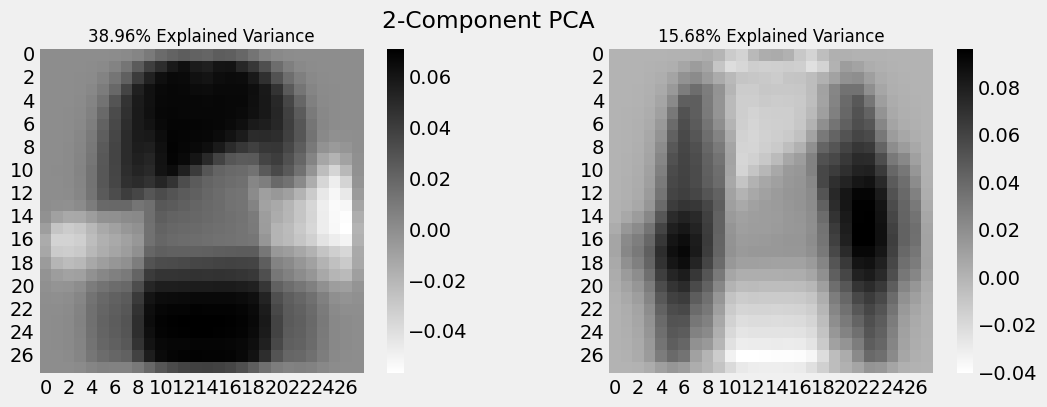

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

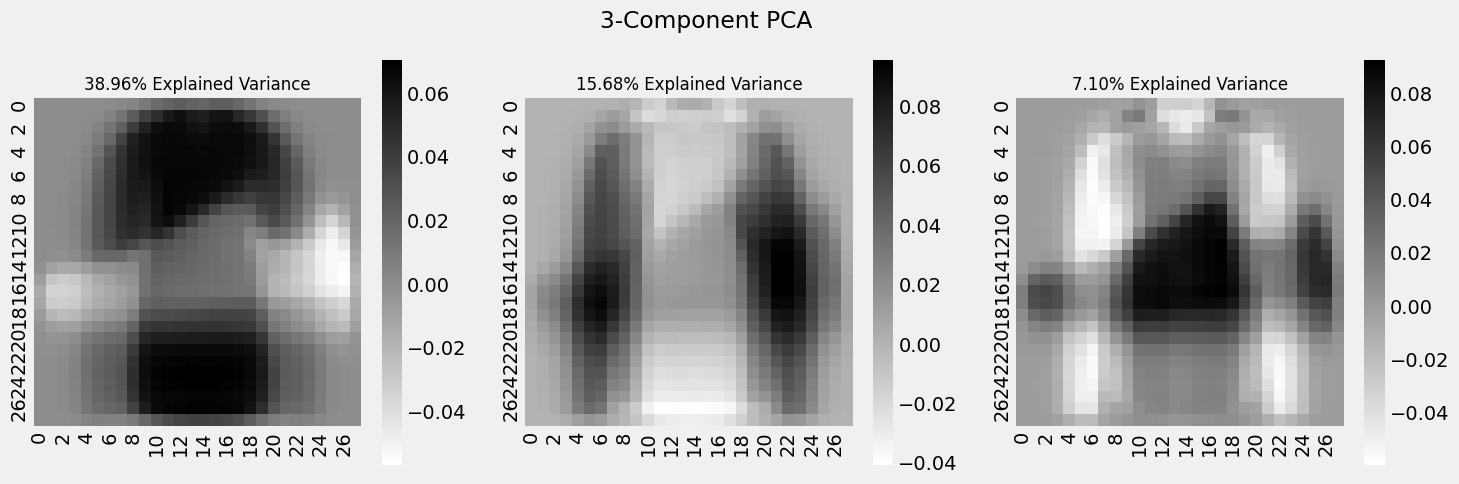

In [41]:
pca = PCA(n_components=3)
X_r = pca.fit(X_train).transform(X_train)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(1, 3, figsize=(16, 5))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2], cmap='gray_r')

axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
    fontsize=12
)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')
axarr[2].set_aspect('equal')

plt.suptitle('3-Component PCA')
pass